In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage import io

In [10]:
# Load and visualize an example image
def load_image(image_path):
    image = io.imread(image_path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return image, image_gray

# Apply Otsu's thresholding
def threshold_segmentation(image_gray):
    thresh_value = threshold_otsu(image_gray)
    binary_mask = image_gray > thresh_value
    return binary_mask

# Apply Canny edge detection
def edge_detection(image_gray):
    edges = cv2.Canny(image_gray, 50, 150)
    return edges

# Post-processing using morphological operations
def refine_segmentation(binary_mask):
    closed_mask = closing(binary_mask, square(3))
    cleared_mask = clear_border(closed_mask)
    return cleared_mask

# Display results
def visualize_results(original, binary_mask, edges, refined_mask):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(original)
    axes[0].set_title("Original Image")
    axes[1].imshow(binary_mask, cmap='gray')
    axes[1].set_title("Threshold Segmentation")
    axes[2].imshow(edges, cmap='gray')
    axes[2].set_title("Edge Detection")
    axes[3].imshow(refined_mask, cmap='gray')
    axes[3].set_title("Refined Mask")
    for ax in axes:
        ax.axis("off")
    plt.show()

# Evaluate segmentation performance
def evaluate_segmentation(ground_truth, segmented_mask):
    ground_truth_resized = cv2.resize(ground_truth.astype(np.uint8), (segmented_mask.shape[1], segmented_mask.shape[0]))
    intersection = np.logical_and(ground_truth_resized, segmented_mask).sum()
    union = np.logical_or(ground_truth_resized, segmented_mask).sum()
    iou = intersection / union if union != 0 else 0
    return iou

In [11]:
# Example usage
image_path = "../data/MSFD/1/img/000000.jpg" 
ground_truth_path = "../data/MSFD/1/face_crop_segmentation/000000_1.jpg" 

In [12]:
image, image_gray = load_image(image_path)
binary_mask = threshold_segmentation(image_gray)
edges = edge_detection(image_gray)
refined_mask = refine_segmentation(binary_mask)

/tmp/ipykernel_107962/3785344304.py:20: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  closed_mask = closing(binary_mask, square(3))


IoU Score: 0.0007


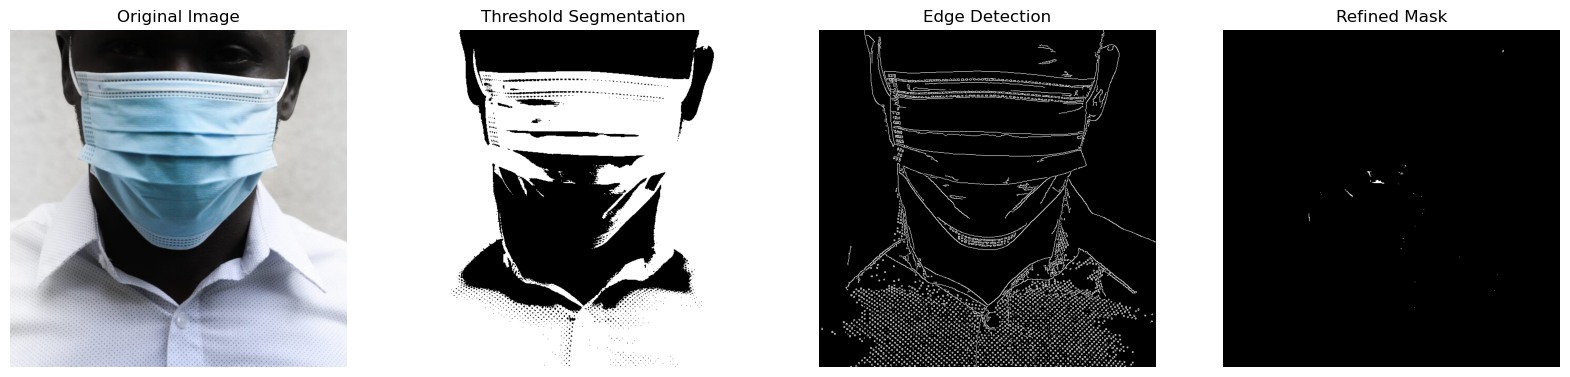

In [13]:
# Load ground truth
if os.path.exists(ground_truth_path):
    ground_truth = io.imread(ground_truth_path, as_gray=True) > 0.5
    iou_score = evaluate_segmentation(ground_truth, refined_mask)
    print(f"IoU Score: {iou_score:.4f}")

visualize_results(image, binary_mask, edges, refined_mask)